In [25]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing as pr
import seaborn as sns
#import ppx
#import rpy2.robjects as ro
#from rpy2.robjects.packages import importr
#from rpy2.robjects import pandas2ri
#pandas2ri.activate()

In [2]:
training= pd.read_csv("Train_VehCSV.csv")
trainscaled=pd.DataFrame(training, columns= training.columns)
scaler=pr.MinMaxScaler()
trainscaled[['WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']]=scaler.fit_transform(trainscaled[['WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']])

First we start with the data representation to understad the how the data is given and study any particular characterstics

Year_Reported
1988    AxesSubplot(0.125,0.125;0.775x0.755)
1989    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
1991    AxesSubplot(0.125,0.125;0.775x0.755)
1992    AxesSubplot(0.125,0.125;0.775x0.755)
1993    AxesSubplot(0.125,0.125;0.775x0.755)
1994    AxesSubplot(0.125,0.125;0.775x0.755)
1995    AxesSubplot(0.125,0.125;0.775x0.755)
1996    AxesSubplot(0.125,0.125;0.775x0.755)
1997    AxesSubplot(0.125,0.125;0.775x0.755)
1998    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

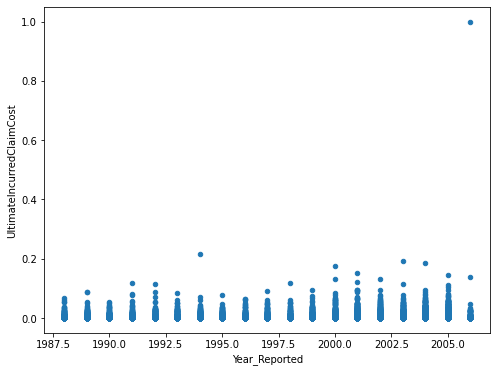

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
trainscaled.groupby('Year_Reported').plot(kind='scatter', x = "Year_Reported", y = "UltimateIncurredClaimCost", ax=ax)
#plt.show()

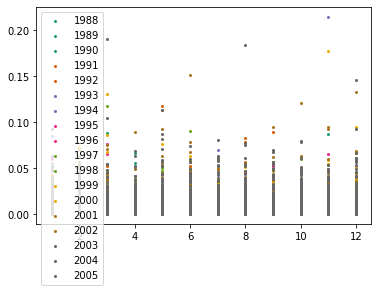

In [4]:
jet= plt.get_cmap('Dark2')
colors = iter(jet(np.linspace(0,1,18)))
for i in list(range(min(trainscaled['Year_Reported']),max(training['Year_Reported']))):
    plt.scatter(x = 'Month_Reported', y='UltimateIncurredClaimCost', data = trainscaled[trainscaled['Year_Reported']==i],label=i, 
    color=next(colors),s=4)
    plt.legend()
    #plt.show()

<AxesSubplot:xlabel='Year_Reported'>

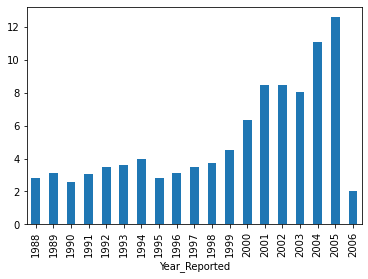

In [6]:
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.sum().plot(kind='bar')

<AxesSubplot:xlabel='Year_Reported'>

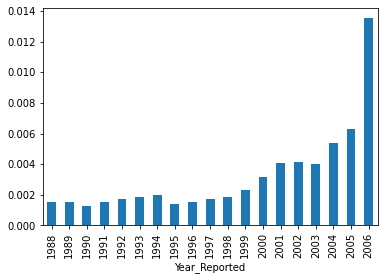

In [7]:
trainscaled.groupby('Year_Reported').UltimateIncurredClaimCost.mean().plot(kind='bar')

So What we observed here is that total sum of claims was highest in 2005 and lowest in 2006. However when we checked mean of claims we found that 2006 had the highest number of claims cost. This reflects that 2006 have very les number of policies compared to previous years and hence distributing more starain per policy.

array([[<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>],
       [<AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>,
        <AxesSubplot:xlabel='Year_Reported'>]], dtype=object)

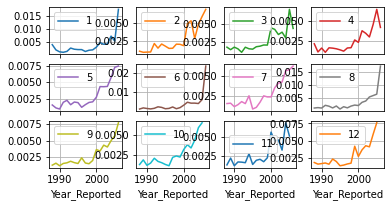

In [8]:
trainscaled.groupby(['Year_Reported','Month_Reported'])['UltimateIncurredClaimCost'].mean().unstack().plot(kind='line',subplots=True, grid=True,
layout=(4,4))

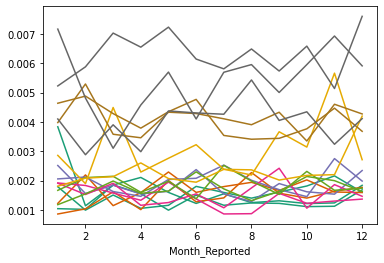

In [9]:
jet= plt.get_cmap('Dark2')
colors = iter(jet(np.linspace(0,1,18)))
for i in list(range(min(trainscaled['Year_Reported']),max(training['Year_Reported']))):
    trainscaled[trainscaled['Year_Reported']==i].groupby('Month_Reported').UltimateIncurredClaimCost.mean().plot(kind='line', color=next(colors))
    #plt.show()

In [10]:
## Checking if there are duplicates
len(trainscaled['ClaimNumber'])!=len(set(trainscaled['ClaimNumber']))

True

In [11]:
trainscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 0 to 36175
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   Day_Reported               36176 non-null  int64  
 3   Month_Reported             36176 non-null  int64  
 4   Year_Reported              36176 non-null  int64  
 5   Age                        36176 non-null  int64  
 6   Gender                     36176 non-null  object 
 7   MaritalStatus              36154 non-null  object 
 8   DependentChildren          36176 non-null  int64  
 9   DependentsOther            36176 non-null  int64  
 10  WeeklyWages                36120 non-null  float64
 11  PartTimeFullTime           36176 non-null  object 
 12  HoursWorkedPerWeek         36127 non-null  float64
 13  DaysWorkedPerWeek          36176 non-null  flo

In [12]:
trainscaled.describe()

,Day_Reported,Month_Reported,Year_Reported,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,36176.000000
mean,15.956297,6.596666,1996.596500,33.795196,0.121296,0.009537,0.055426,0.059011,0.650966,0.009328,0.002690
std,8.860519,3.394674,5.196147,12.114729,0.525395,0.106163,0.032534,0.019522,0.091180,0.021956,0.008765
min,1.000000,1.000000,1988.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,1992.000000,23.000000,0.000000,0.000000,0.026547,0.059375,0.666667,0.000842,0.000200
50%,16.000000,7.000000,1997.000000,32.000000,0.000000,0.000000,0.052343,0.059375,0.666667,0.002408,0.000808
75%,24.000000,10.000000,2001.000000,43.000000,0.000000,0.000000,0.066569,0.062500,0.666667,0.011445,0.002003
max,31.000000,12.000000,2006.000000,79.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
trainscaled.shape

(36176, 17)

In [14]:
trainscaled.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
Day_Reported                  0
Month_Reported                0
Year_Reported                 0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [15]:
trainscaled['WeeklyWages']=trainscaled['WeeklyWages'].fillna(trainscaled['WeeklyWages'].mean())
trainscaled['HoursWorkedPerWeek']=trainscaled['HoursWorkedPerWeek'].fillna(trainscaled['HoursWorkedPerWeek'].mean())
trainscaled['MaritalStatus']=trainscaled['MaritalStatus'].fillna(trainscaled['MaritalStatus'].mode()[0])

In [16]:
trainscaled.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
Day_Reported                 0
Month_Reported               0
Year_Reported                0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

So this means we also have duplicates, that mean one plociholder may have claimed again

In [17]:
predictors= trainscaled[['Age' , 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren']]

In [18]:
predictors_c=trainscaled[['Age', 'DaysWorkedPerWeek' , 'HoursWorkedPerWeek' , 'WeeklyWages' , 'DependentsOther' , 'DependentChildren','MaritalStatus',  'Gender', 'PartTimeFullTime']]
target=trainscaled['InitialIncurredCalimsCost']
predictors_c=pd.get_dummies(predictors_c, columns=['MaritalStatus',  'Gender', 'PartTimeFullTime'])


C:\Users\asus\AppData\Local\Temp\ipykernel_9152\4149400647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<AxesSubplot:xlabel='InitialIncurredCalimsCost', ylabel='Density'>

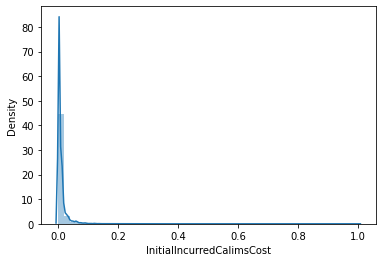

In [29]:
target.describe()
sns.distplot(target)


C:\Users\asus\AppData\Local\Temp\ipykernel_9152\142608786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainscaled['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

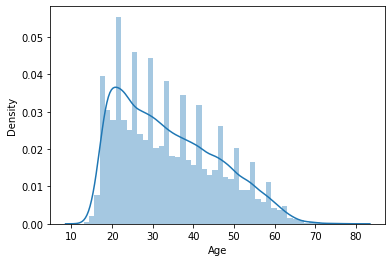

In [30]:
sns.distplot(trainscaled['Age'])

<AxesSubplot:xlabel='DependentChildren', ylabel='count'>

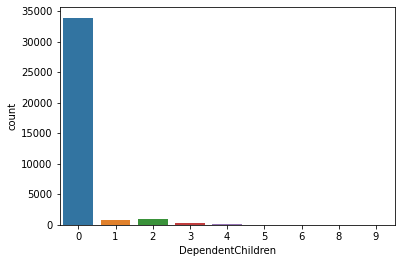

In [31]:
sns.countplot(x= 'DependentChildren', data= trainscaled)

MULTICOLLINEARITY

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["feature"] = predictors_c.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_c.values, i)
                          for i in range(len(predictors_c.columns))]
print(vif_data)

c:\Users\asus\OneDrive\Stochastics and Data Science\Semester 3\Statistcal Machine learning\Project\Motor Insurance\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


               feature       VIF
0                  Age  1.430220
1    DaysWorkedPerWeek  1.750516
2   HoursWorkedPerWeek  1.228732
3          WeeklyWages  1.120234
4      DependentsOther  1.040815
5    DependentChildren  1.094642
6      MaritalStatus_M       inf
7      MaritalStatus_S       inf
8      MaritalStatus_U       inf
9             Gender_F       inf
10            Gender_M       inf
11            Gender_U       inf
12  PartTimeFullTime_F       inf
13  PartTimeFullTime_P       inf


There does not exist collinearity among the predictos. It can be seen here that for the categorical variables we have values as infinty this is due to the fact that these classes are built from one base of column since we are susng dummy variable here.

PRINCIPAL COMPONENET ANALYSIS

In [20]:
from sklearn.decomposition import PCA

pca=PCA()
prin_comp= pca.fit_transform(predictors)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
np.multiply(pca.explained_variance_ratio_,pca.explained_variance_)



[1.46767876e+02 2.75301022e-01 1.08408902e-02 8.41218417e-03
 9.69815398e-04 3.13039400e-04]
[9.97988376e-01 1.87198471e-03 7.37156021e-05 5.72009506e-05
 6.59452545e-06 2.12859715e-06]


array([1.46472634e+02, 5.15359303e-04, 7.99142745e-07, 4.81184931e-07,
       6.39547233e-09, 6.66334773e-10])

The PCA transformation is unsupervised, meaning that it does not consider the target variable when determining principal components. Hence, there is no guarantee that the principal components with the largest variance will be the best ones for predicting the target. There is a chance that the directions with high predictive power but low variance are omitted, resulting in poor model performance.


In [21]:
from sklearn.decomposition import SparsePCA


s_pca= SparsePCA()
sparse_pca= s_pca.fit_transform(predictors)
s_pca.n_components_

6

_________________________________Linear Regression_____________________________________________

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm

In [33]:
t_columns=["Age" , "DaysWorkedPerWeek" , "HoursWorkedPerWeek" , "WeeklyWages" , "DependentsOther" , "DependentChildren"]
def subsets(numbers):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])
    return x + [[numbers[0]] + y for y in x]
 
# wrapper function
def subsets_of_given_size(numbers, n):
    return [x for x in subsets(numbers) if len(x)==n]
    print(subsets_of_given_size(numbers, n))

t_sub=subsets(t_columns)
len(t_sub)
t_sub=t_sub[1:63]
#t_sub=pd.DataFrame(t_sub, columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7'])
#t_sub.fillna("na", inplace=True)
#print(t_sub)

In [34]:
rsqr_adj= []
aic= []
bic= []

for i in range(len(t_sub)):
    p= predictors[t_sub[i]]
    lrmodel=sm.OLS(target,p)
    fitted_model=lrmodel.fit()
    a= fitted_model.rsquared_adj
    b= fitted_model.aic
    c= fitted_model.bic
    rsqr_adj.append(a)
    aic.append(b)
    bic.append(c)

[['Age', 'WeeklyWages'], ['Age', 'WeeklyWages', 'DependentChildren'], ['Age', 'WeeklyWages', 'DependentsOther'], ['Age', 'WeeklyWages', 'DependentsOther', 'DependentChildren'], ['Age', 'HoursWorkedPerWeek', 'WeeklyWages'], ['Age', 'HoursWorkedPerWeek', 'WeeklyWages', 'DependentChildren'], ['Age', 'HoursWorkedPerWeek', 'WeeklyWages', 'DependentsOther'], ['Age', 'HoursWorkedPerWeek', 'WeeklyWages', 'DependentsOther', 'DependentChildren'], ['Age', 'DaysWorkedPerWeek', 'WeeklyWages'], ['Age', 'DaysWorkedPerWeek', 'WeeklyWages', 'DependentChildren'], ['Age', 'DaysWorkedPerWeek', 'WeeklyWages', 'DependentsOther'], ['Age', 'DaysWorkedPerWeek', 'WeeklyWages', 'DependentsOther', 'DependentChildren'], ['Age', 'DaysWorkedPerWeek', 'HoursWorkedPerWeek', 'WeeklyWages'], ['Age', 'DaysWorkedPerWeek', 'HoursWorkedPerWeek', 'WeeklyWages', 'DependentChildren'], ['Age', 'DaysWorkedPerWeek', 'HoursWorkedPerWeek', 'WeeklyWages', 'DependentsOther']]


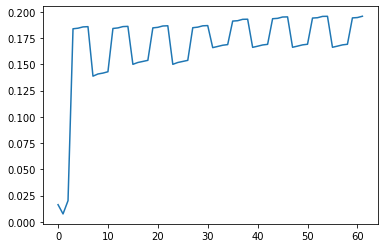

In [35]:
plt.plot(rsqr_adj)
variables=[]
for i in range(len(rsqr_adj)):
    if rsqr_adj[i] > 0.187:
        m= t_sub[i]
        variables.append(m)

print(variables)


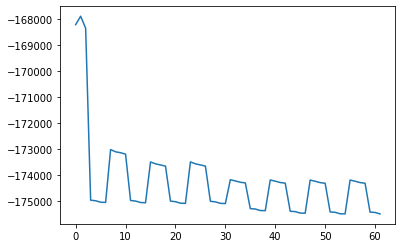

In [36]:
plt.plot(aic)


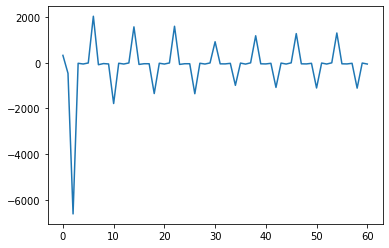

In [37]:
aic_diff= np.diff(aic)
plt.plot(aic_diff)

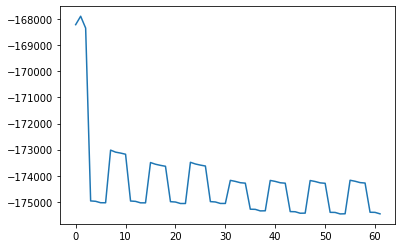

In [38]:
plt.plot(bic)

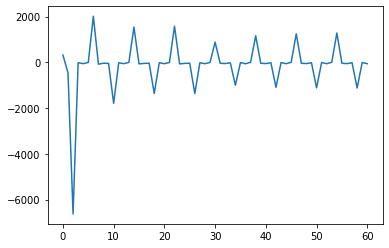

In [39]:
bic_diff= np.diff(bic)
plt.plot(bic_diff)

R square statistic explains the proportion of variance explained by the model. So, if the value is closr to 1 the better it is.
Another statistic is Residual standard error, this explains the proportion of variance unexplained by the model. R square is also equls to TSS- RSS

It is observed that the variablty explained using the linear regrssion is approximately 19% if we take all the variabes, which is not very high. Therefore, this means that our data has more complex structure and may require use of categorical variables or even another method.

So as long as we keep on adding predictors to the model, we will observe that adjusted r square will keep on increasing. Therefore, need to check for increase in r square when one more variable is added.

We have listed the variables that takes upto the mac r square.


LINEAR REGRESSION WITH CATEGORICAL VARIABLES

In [40]:
t_columns= ['Age', 'DaysWorkedPerWeek',
       'HoursWorkedPerWeek', 'WeeklyWages', 'DependentsOther',
       'DependentChildren', 'MaritalStatus_M', 'MaritalStatus_S',
       'MaritalStatus_U', 'Gender_F', 'Gender_M', 'Gender_U',
       'PartTimeFullTime_F', 'PartTimeFullTime_P']
t_sub_c=subsets(t_columns)

t_sub_c=t_sub_c[1:]


In [67]:
rsqr_adj_c=[]
aic_c= []
bic_c= []
for i in range(len(t_sub_c)):
    p=predictors_c[t_sub_c[i]]
    lrmodel=sm.OLS(target,p)
    fitted_model=lrmodel.fit()
    a= fitted_model.rsquared_adj
    b= fitted_model.aic
    c= fitted_model.bic
    rsqr_adj_c.append(a)
    aic_c.append(b)
    bic_c.append(c)


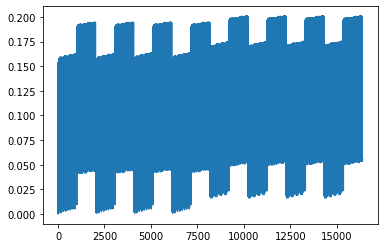

In [42]:
plt.plot(rsqr_adj_c)

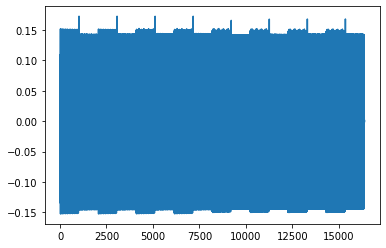

In [44]:
rsqr_adj_c_diff=np.diff(rsqr_adj_c)
plt.plot(rsqr_adj_c_diff)

In [59]:
variables=[]
for i in range(len(rsqr_adj_c)):
    if rsqr_adj_c[i] > 0.2001:
        m= t_sub_c[i]
        variables.append(m)

Working on full scale model

In [74]:
lrmodel=sm.OLS(target,predictors_c)
fitted_model=lrmodel.fit()
print(fitted_model.summary())
fitted_model.rsquared_adj
fitted_model.aic

                                OLS Regression Results                               
Dep. Variable:     InitialIncurredCalimsCost   R-squared:                       0.057
Model:                                   OLS   Adj. R-squared:                  0.056
Method:                        Least Squares   F-statistic:                     197.9
Date:                       Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                               23:48:23   Log-Likelihood:                 87871.
No. Observations:                      36176   AIC:                        -1.757e+05
Df Residuals:                          36164   BIC:                        -1.756e+05
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

-175718.98004678218

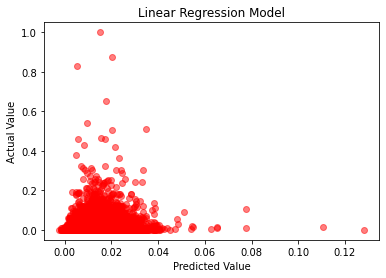

In [75]:
y_pred = fitted_model.predict(predictors_c)
actual_values = target
plt.scatter(y_pred, actual_values, alpha=.5,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()

QUADRATIC REGRESSION


WITHOUT CATEGORICAL VARIABLES

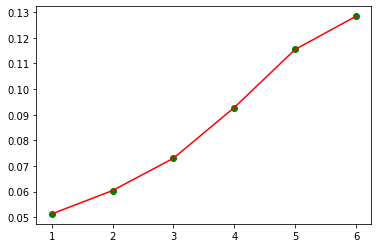

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
number_degrees= [1,2,3,4,5,6]
plt_r_squared=[]
for degree in number_degrees:
    poly_model= pr.PolynomialFeatures(degree=degree)
    poly_x_values= poly_model.fit_transform(predictors)
    poly_model.fit(poly_x_values,target)
    regression_model= LinearRegression()
    regression_model.fit(poly_x_values,target)
    target_pred=regression_model.predict(poly_x_values)
    plt_r_squared.append(r2_score(target,target_pred))
plt.scatter(number_degrees,plt_r_squared, color= "green")
plt.plot(number_degrees,plt_r_squared, color= "red")

WITH CATEGORICAL VARIABLES

In [37]:
# plt_r_squared_c=[]
# for degree in number_degrees:
#     poly_model= pr.PolynomialFeatures(degree=degree)
#     poly_x_values= poly_model.fit_transform(predictors_c)
#     poly_model.fit(poly_x_values,target)
#     regression_model= LinearRegression()
#     regression_model.fit(poly_x_values,target)
#     target_pred=regression_model.predict(poly_x_values)
#     plt_r_squared_c.append(r2_score(target,target_pred))
# plt.scatter(number_degrees,plt_r_squared_c, color= "green")
# plt.plot(number_degrees,plt_r_squared_c, color= "red")

Generalised linear models

In [68]:
glm=lm.LinearRegression()
glm.fit(predictors_c, target)
glm.score(predictors_c, target)
print ("R^2 is: \n", glm.score(predictors_c, target))

R^2 is: 
 0.056770248439949156


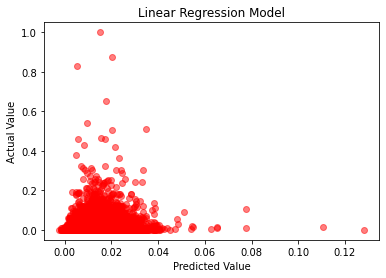

In [71]:
y_pred = glm.predict(predictors_c)
actual_values = target
plt.scatter(y_pred, actual_values, alpha=.5,
            color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()

___________________________________________TREE_BASED METHODS________________________________________________

BAGGING

In [79]:
from matplotlib.pyplot import plot
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
rsqr=[]
trees=np.arange(100,300,5).tolist()
for i in trees:
    model=BaggingRegressor(n_estimators= i,verbose=1,n_jobs=-1,random_state=56)
    fitted=model.fit(predictors_c,target)
    p=model.score(predictors_c,target)
    rsqr.append(p)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    6.2s remaining:    6.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

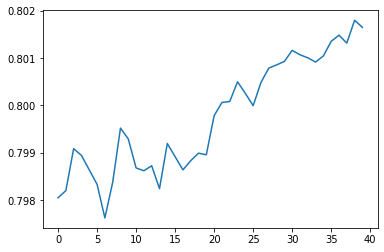

In [80]:
plt.plot(rsqr)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# params = {'n_estimators': [100,150,200,250,300],
#           'max_samples': [0.5,1.0],
#           'max_features': [0.5,1.0],
#           'bootstrap': [True, False],
#           'bootstrap_features': [True, False]}

# bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=5, n_jobs=-1, verbose=1)
# bagging_regressor_grid.fit(predictors, target)

# print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(predictors, target))
# #print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
# print('Best Parameters : ',bagging_regressor_grid.best_params_)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train R^2 Score : 0.411
Best R^2 Score Through Grid Search : 0.184
Best Parameters :  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}


RANDOM FOREST

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# from sklearn import metrics
# ranforreg= RandomForestRegressor(n_estimators= 500, n_jobs= -1, random_state= 1)
# ranforreg.fit(predictors,target)
# print('Training Coefficient of r^2: %.3f'%ranforreg.score(predictors,target))

Training Coefficient of r^2: 0.845


In [ ]:
# parameters = {
#     'max_depth': [80, 90, 100],
#     'n_estimators': [50, 80, 100]
# }
# gridforest = GridSearchCV(ranforreg, parameters, cv = 3, n_jobs = -1, verbose = 1)
# gridforest.fit(predictors, target)
# gridforest.best_params_



Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_depth': 90, 'n_estimators': 50}

In [ ]:
# print('Train R^2 Score : %.3f'%gridforest.best_estimator_.score(predictors, target))
# #print('Test R^2 Score : %.3f'%gridforest.best_estimator_.score(X_test, Y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%gridforest.best_score_)
# print('Best Parameters : ',gridforest.best_params_)

Train R^2 Score : 0.805
Best R^2 Score Through Grid Search : -0.134
Best Parameters :  {'max_depth': 90, 'n_estimators': 50}


GRADIENT BOOSTING

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error

In [ ]:
# gbr = GradientBoostingRegressor(n_estimators=1000, verbose= 1, random_state= 56, learning_rate=0.01)
# gbr.fit(predictors, target)
# gbr.score(predictors,target)


      Iter       Train Loss   Remaining Time 
         1           0.0001           31.18s
         2           0.0001           33.99s
         3           0.0001           32.58s
         4           0.0001           31.86s
         5           0.0001           30.62s
         6           0.0001           29.95s
         7           0.0001           29.05s
         8           0.0001           28.48s
         9           0.0001           28.15s
        10           0.0001           28.76s
        20           0.0001           26.09s
        30           0.0001           24.66s
        40           0.0001           25.10s
        50           0.0001           25.24s
        60           0.0001           25.40s
        70           0.0001           24.54s
        80           0.0001           24.05s
        90           0.0001           23.66s
       100           0.0001           23.12s
       200           0.0001           19.66s
       300           0.0001           16.74s
       40

0.37477815285565996

In [ ]:
# mass=importr("MASS")
# utils=importr('utils')
# utils.install_packages('ISLR2', repos="https://cloud.r-project.org")
# utils.install_packages('leaps', repos="https://cloud.r-project.org")
# islr2=importr('ISLR2')
# leaps=importr('leaps')